# STROKE DECISION SUPPORT SYSTEM ICA 2

In [1]:
#Importation of Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report



#This importation is to ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Importation and Loading of Datasets
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# STATISTICAL ANALYSIS

In [3]:
#Shape of the Datsaset Showing the Number of Rows and Columns
df.shape

(5110, 11)

In [5]:
#Checking the number of categorical columns in the dataset
#We have five categorical column in the dataset 
cat = df.select_dtypes(include='object').columns
print ("There are " ,len(cat), "categorical column in the dataset :\n", cat)

There are  5 categorical column in the dataset :
 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [7]:
#Checking the number of Numberical columns in the dataset
numer = df.select_dtypes(include=np.number).columns
print ("There are",len(numer), "Numerical column in the dataset which are the independent variables:\n", numer)

There are 6 Numerical column in the dataset which are the independent variables:
 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


In [8]:
#details of the last 5 rows of the dataset  
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [19]:
#Checking for Duplicate values
df.duplicated() .sum()  
print("There are", df.duplicated() .sum(), "duplicate values in the dataset")

There are 0 duplicate values in the dataset


In [20]:
#Summary of the Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [21]:
#Description of the Dataset showing the Mean, Median, Mode, Standard Deviation, Minimum and Maximum Values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


# DATA PREPROCESSING

In [24]:
#Checking for Missing Values in the Dataset using Columns
print (df.isnull().sum())
print("There are", df.isnull().sum().sum(), "missing values in the dataset")    

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
There are 201 missing values in the dataset


# FILLING MISSING VLAUES IN THE BMI 

In [28]:
### Since the values are numerical, we will fill the mssing values with the mean value of the BMI column
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [29]:
#This has two unique values which are Benign (B) and Malignant (M)
df['stroke'].unique()

array([1, 0])

#### we have 2 unique values in the output variable which is 1 (means the patient is likely to have stroke due to their lifestyle) and 0 (means not likely to have stroke becaus of their lifestyle)

# EXPLORATORY DATA ANALYSIS

In [42]:
stroke = df['stroke'].value_counts()
print(stroke)
print("Percentage of patience to develop Stroke (1): "+str(round(stroke[1]*100/5110,2)) +" %")
print("Percentage of patience not to develop Stroke (0): "+str(round(stroke[0]*100/5110,2))+ " %")

stroke
0    4861
1     249
Name: count, dtype: int64
Percentage of patience to develop Stroke (1): 4.87 %
Percentage of patience not to develop Stroke (0): 95.13 %


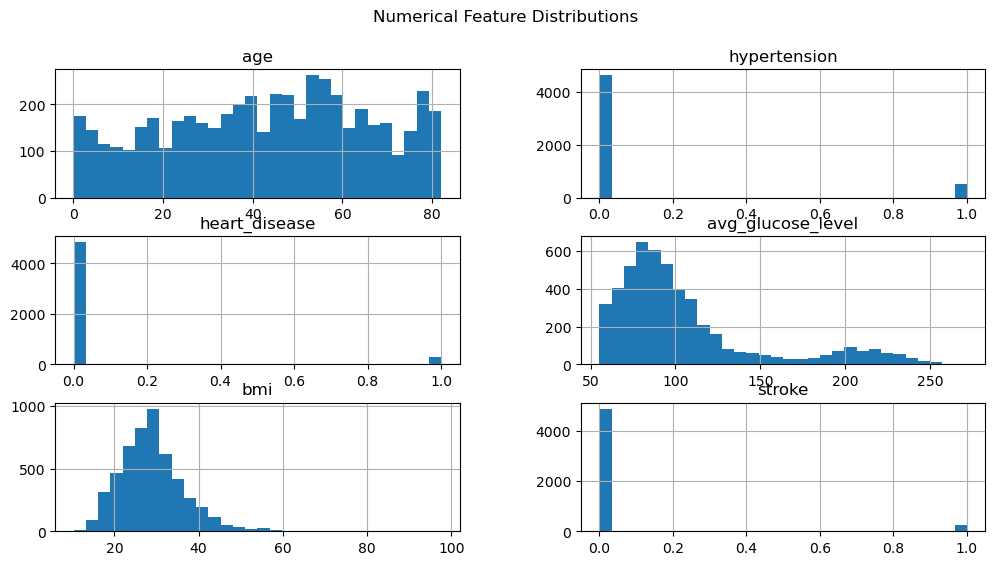

In [34]:
#Numerical Feature Distributions Plot
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(12,6), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()